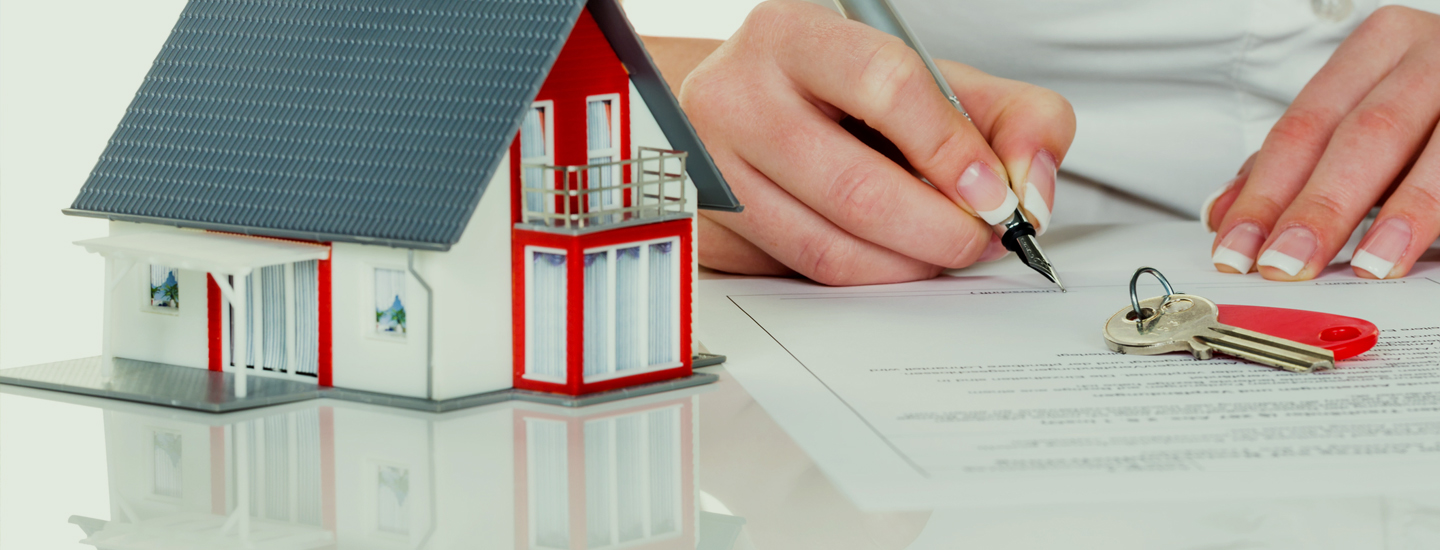

# Objective  - Loan Prediction

# Exploratory Data Analysis (EDA)

# 1. Load Python Modules

In [36]:
#  Use Python's import statement to load modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# 2. Read the Dataset from CSV file  - Using Pandas

In [37]:
file_path=r"dataset/loan_train_dataset.csv"
loan_df=pd.read_csv(file_path)
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [38]:
#drop - sensitive - non imp columns for data analysis 
print(loan_df["Loan_ID"].nunique())
loan_df.drop("Loan_ID",axis=1,inplace=True)
# print columns names
print(loan_df.columns)

614
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


# 3. Basic Inspection on given dataset

In [39]:
def basic_inspection_dataset(table):
    """Generates a basic inspection dataset from the given table."""
    
    print("top 5 rows - using head")
    print(table.head())
    print()
        
    print("bottom 5 rows using tail")
    print(table.tail())
    print()
        
    print("numbers of samples and columns")
    print(table.shape)
    print()
    
    print("numbers of samples ")
    print(len(table))
    print()
    
    print("numbers of entries in the data frame")
    print(table.size)
    print()
    
    print("Columns Names")
    print(table.columns)
    print()

    print("Columns dtypes")
    print(table.dtypes)
    print()
    
    print("Dataframe info")
    print(table.info())
    print()
    
    print()
    print("check the missing value in each column")
    print(table.isnull().sum())
          
    print()
    print("check the missing value in each column")
    print(table.isna().sum())

basic_inspection_dataset(loan_df)

top 5 rows - using head
  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2       

**Observations**

- Loan Dataset is a machine learning classification task.
- Loan Status is the target column and did not have any null values.
- We have 12 Independent Variables, with 6 as categorical and the rest are numerical.
- Observed missing values in Gender, Married, Dependents, Self-Employed in Categorical Columns.
- Observed missing values in Loan Amount, Loan Amount Term, Credit History in Numerical Columns.
- We have a total of 614 records/samples/observations.


# 4. Handling Missing Values - Categorical - Variables

- Missing Values in Categorical Columns - Replaced with Mode

In [40]:
def print_cat_values(cat_var):
    print("We are studying about varailbe/column/feature :", cat_var)
    print("categories:",loan_df[cat_var].unique())
    print("num of categories:",loan_df[cat_var].nunique())
    print("Value-counts:", loan_df[cat_var].value_counts())  

In [41]:
cat_vars = loan_df.select_dtypes(include="object").columns
print(cat_vars) ### selct the missing values - cat -vars
cat_vars = ['Gender', 'Married', 'Dependents', 'Self_Employed']

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')


In [42]:
for var in cat_vars:
    print_cat_values(var)
    print("===============================================================================")
    print()

We are studying about varailbe/column/feature : Gender
categories: ['Male' 'Female' nan]
num of categories: 2
Value-counts: Gender
Male      489
Female    112
Name: count, dtype: int64

We are studying about varailbe/column/feature : Married
categories: ['No' 'Yes' nan]
num of categories: 2
Value-counts: Married
Yes    398
No     213
Name: count, dtype: int64

We are studying about varailbe/column/feature : Dependents
categories: ['0' '1' '2' '3+' nan]
num of categories: 4
Value-counts: Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

We are studying about varailbe/column/feature : Self_Employed
categories: ['No' 'Yes' nan]
num of categories: 2
Value-counts: Self_Employed
No     500
Yes     82
Name: count, dtype: int64



In [43]:
for var in cat_vars:
    mode = loan_df[var].mode()[0]
    #print(mode)

    # fill the missing value with mode
    loan_df[var].fillna(mode,inplace=True)
    
# check for missing values - for confirmation
loan_df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
# in dependents columns - replacing/filling with 3+ with 3
loan_df["Dependents"] = loan_df["Dependents"].map(lambda x : '3' if x=='3+' else x)
loan_df["Dependents"].value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

# 5. Categorical- UniVariate - Analysis -Using Pipeline

- Categorical Uni Variate Analysis
- Frequency Table
- Relative Frequency Table
- Bar Chart
- Pi Chart

In [45]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        # get cat columns 
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()  
        
        

Gender frequency table
+---+--------+-----------+
|   | Class  | Frequency |
+---+--------+-----------+
| 0 |  Male  |    502    |
| 1 | Female |    112    |
+---+--------+-----------+
Gender Relative frequency table
+---+--------+-----------+----------------------+
|   | Class  | Frequency | Relative Frequency % |
+---+--------+-----------+----------------------+
| 0 |  Male  |    502    |        81.76         |
| 1 | Female |    112    |        18.24         |
+---+--------+-----------+----------------------+


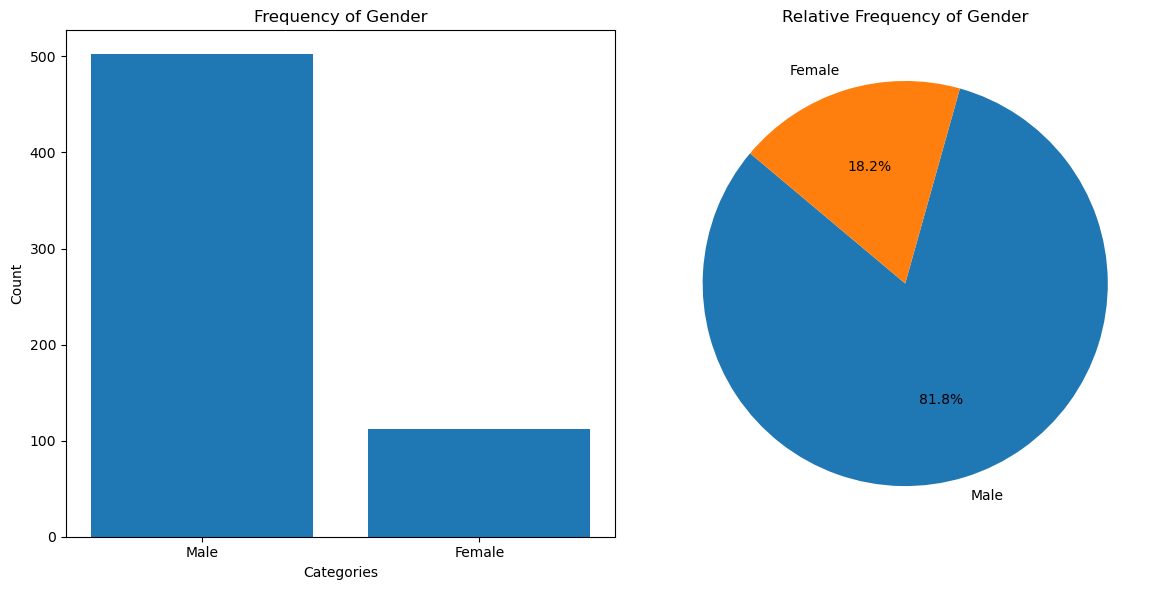

Married frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  Yes  |    401    |
| 1 |  No   |    213    |
+---+-------+-----------+
Married Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  Yes  |    401    |        65.31         |
| 1 |  No   |    213    |        34.69         |
+---+-------+-----------+----------------------+


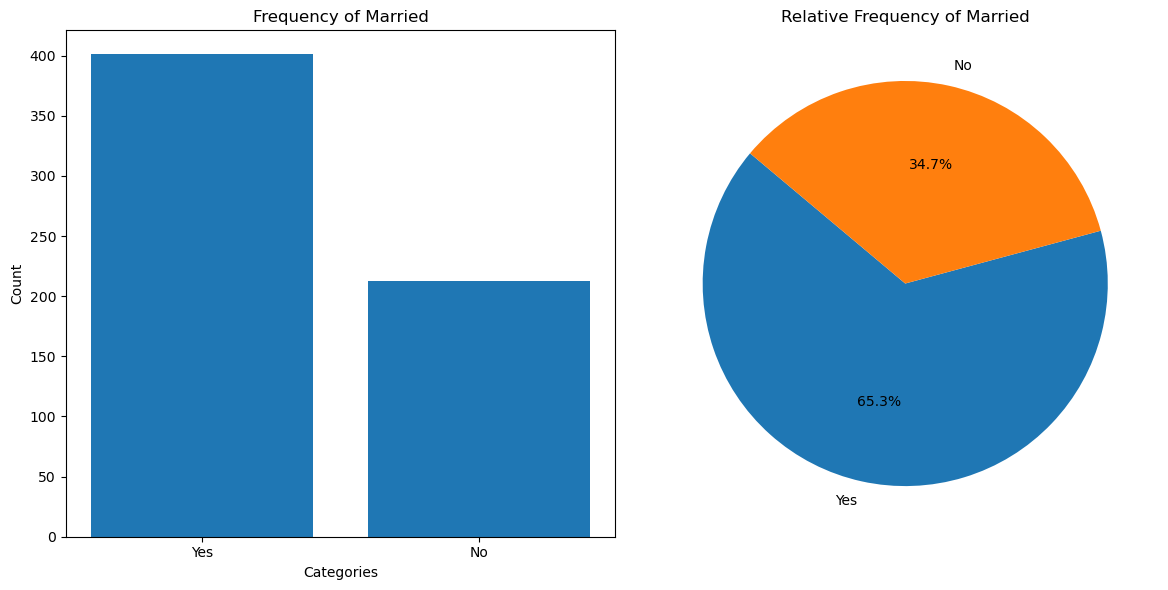

Dependents frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   0   |    360    |
| 1 |   1   |    102    |
| 2 |   2   |    101    |
| 3 |   3   |    51     |
+---+-------+-----------+
Dependents Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |   0   |    360    |        58.63         |
| 1 |   1   |    102    |        16.61         |
| 2 |   2   |    101    |        16.45         |
| 3 |   3   |    51     |         8.31         |
+---+-------+-----------+----------------------+


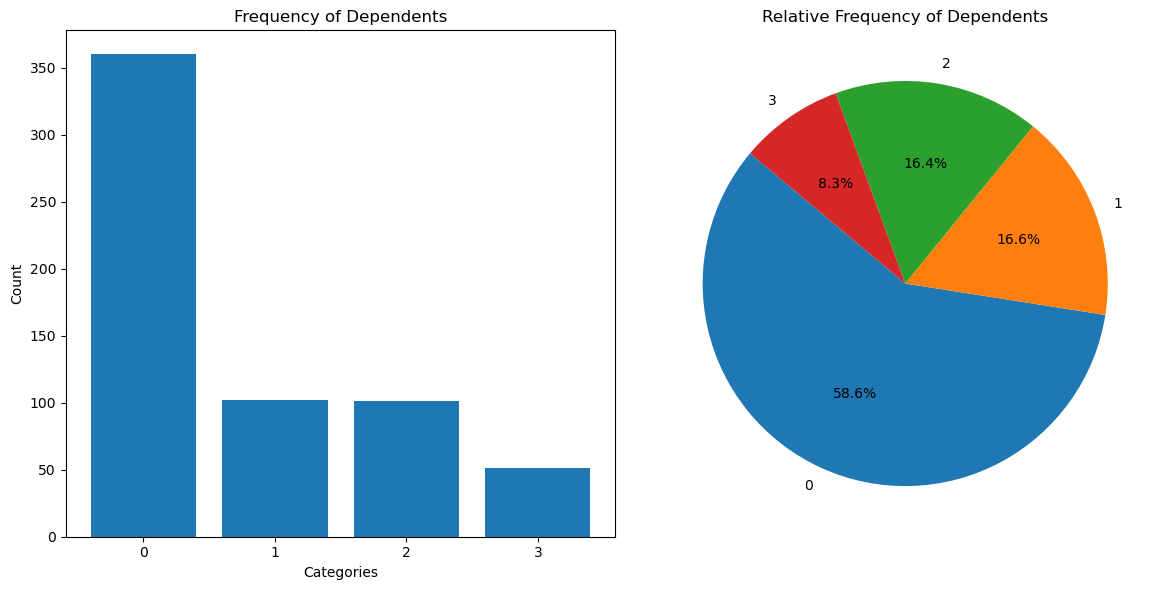

Education frequency table
+---+--------------+-----------+
|   |    Class     | Frequency |
+---+--------------+-----------+
| 0 |   Graduate   |    480    |
| 1 | Not Graduate |    134    |
+---+--------------+-----------+
Education Relative frequency table
+---+--------------+-----------+----------------------+
|   |    Class     | Frequency | Relative Frequency % |
+---+--------------+-----------+----------------------+
| 0 |   Graduate   |    480    |        78.18         |
| 1 | Not Graduate |    134    |        21.82         |
+---+--------------+-----------+----------------------+


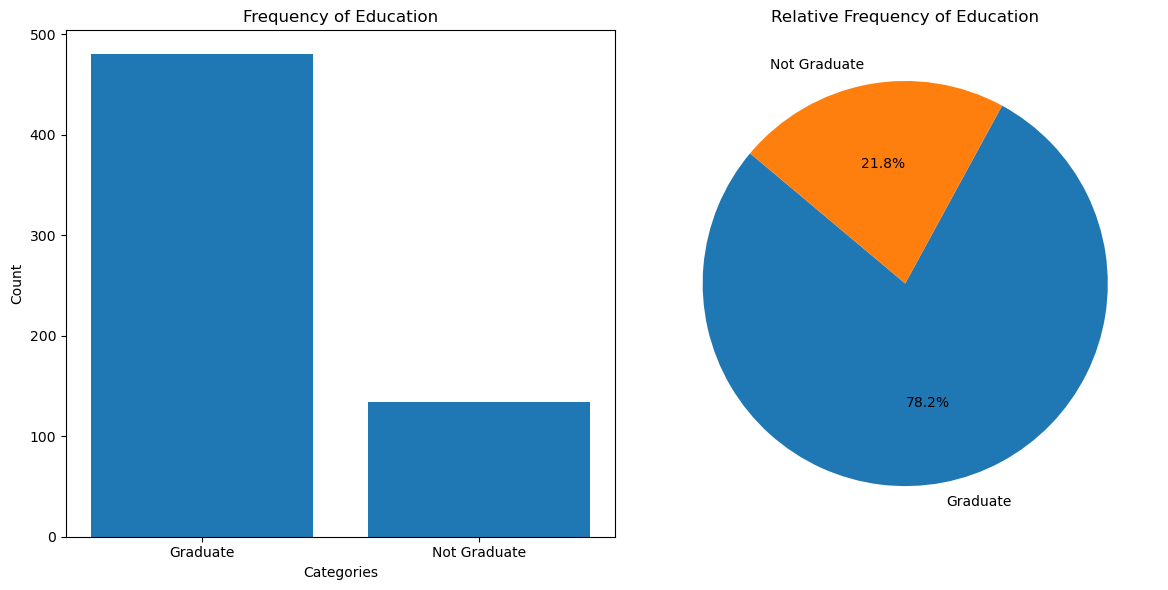

Self_Employed frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  No   |    532    |
| 1 |  Yes  |    82     |
+---+-------+-----------+
Self_Employed Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  No   |    532    |        86.64         |
| 1 |  Yes  |    82     |        13.36         |
+---+-------+-----------+----------------------+


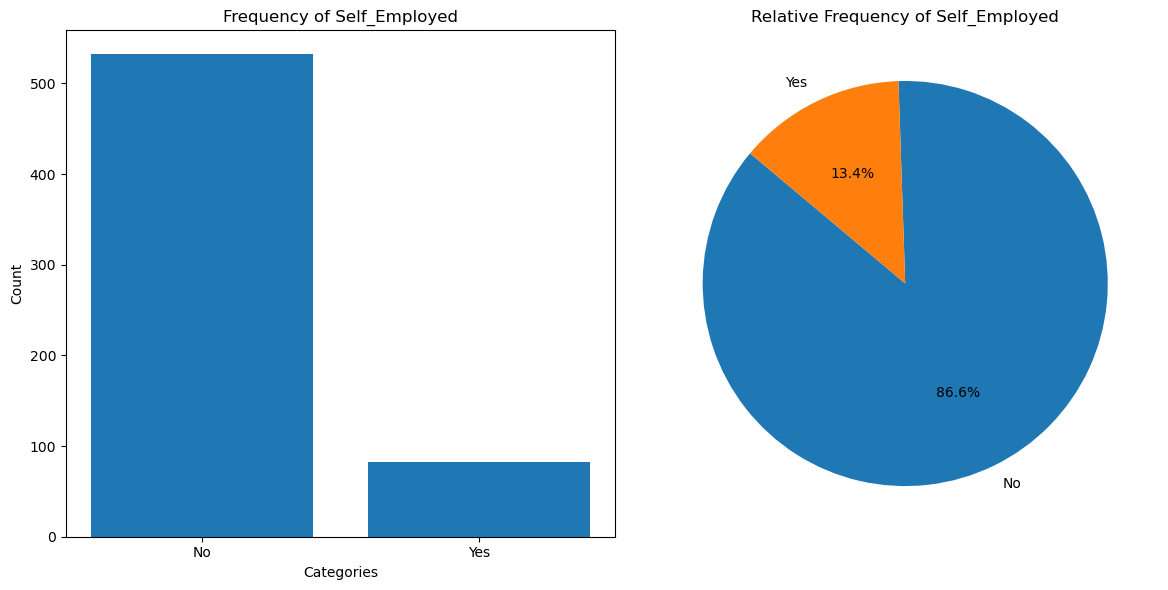

Property_Area frequency table
+---+-----------+-----------+
|   |   Class   | Frequency |
+---+-----------+-----------+
| 0 | Semiurban |    233    |
| 1 |   Urban   |    202    |
| 2 |   Rural   |    179    |
+---+-----------+-----------+
Property_Area Relative frequency table
+---+-----------+-----------+----------------------+
|   |   Class   | Frequency | Relative Frequency % |
+---+-----------+-----------+----------------------+
| 0 | Semiurban |    233    |        37.95         |
| 1 |   Urban   |    202    |         32.9         |
| 2 |   Rural   |    179    |        29.15         |
+---+-----------+-----------+----------------------+


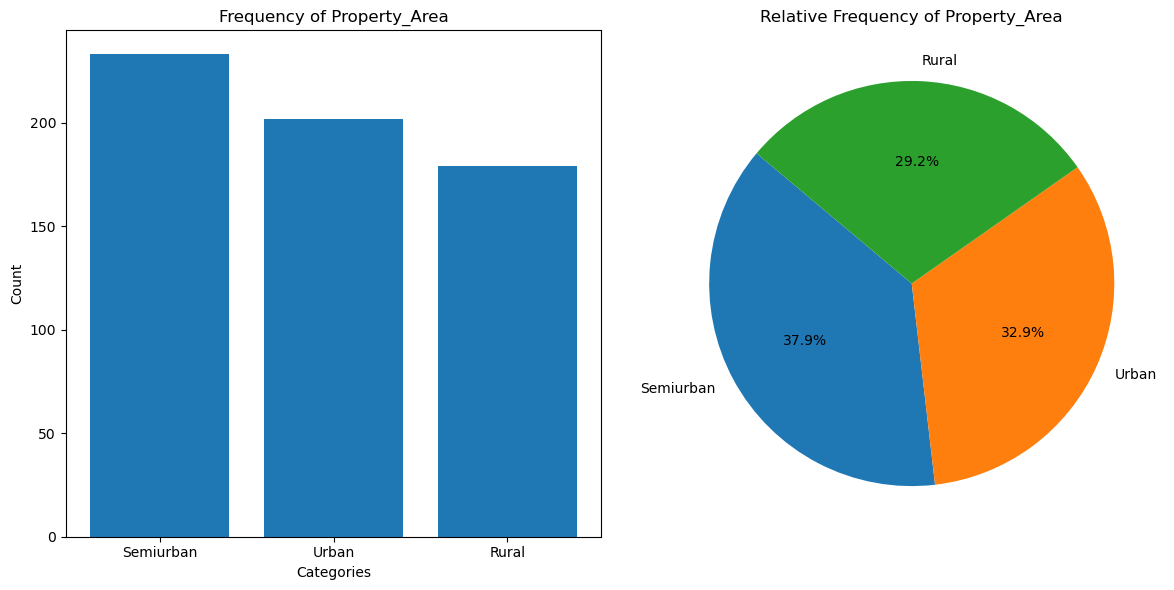

Loan_Status frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   Y   |    422    |
| 1 |   N   |    192    |
+---+-------+-----------+
Loan_Status Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |   Y   |    422    |        68.73         |
| 1 |   N   |    192    |        31.27         |
+---+-------+-----------+----------------------+


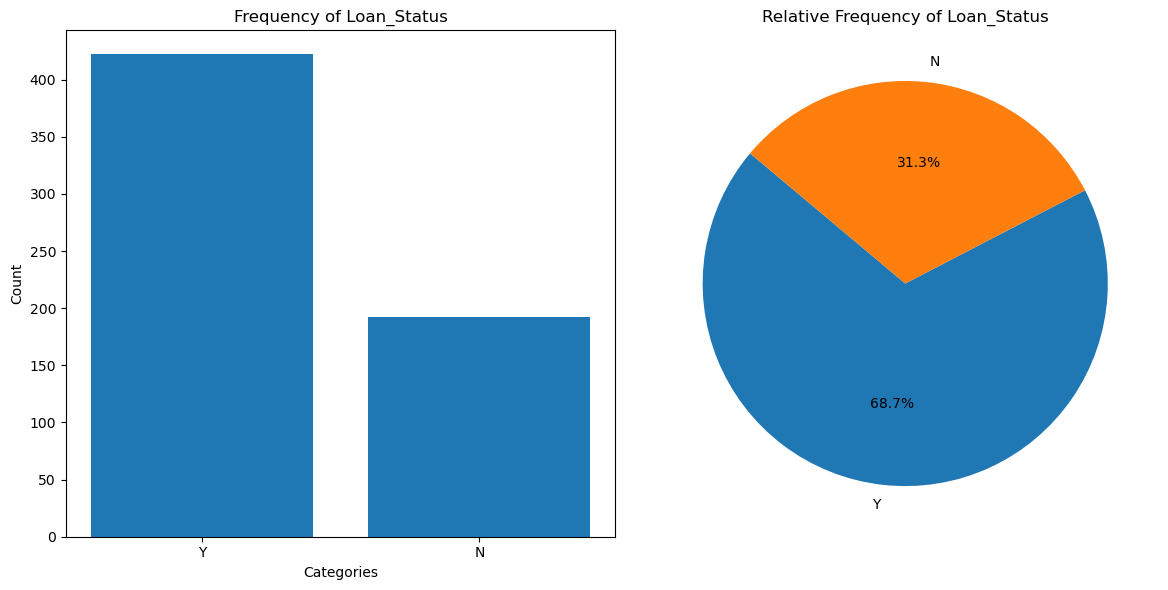

In [46]:
pipeline_cat_var = Pipeline([
    ('cat_univaraite_analysis', BarPieChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(loan_df)

**Observations**

- In Gender:
  - Male: 81%
  - Female: 18%

- In Married:
  - Married: 65%
  - Non-Married: 15%

- In Dependents:
  - 0 Dependents: 58%
  - 1-2 Dependents: 16%
  - 3+ Dependents: 8%

- In Graduate:
  - Graduated: 78%
  - Non-Graduated: 21%

- In Self-Employed:
  - Self-Employed: 13%
  - Not Self-Employed: 86%

- In Property Type:
  - Semiurban: 38%
  - Urban: 32%
  - Rural: 29%

- In Loan Status:
  - Success: 68%
  - Non-Success/Rejected: 31%


# 6. Handling Missing Values in Numerical Columns

- Handling the Missing Values in Numerical Columns by median

In [47]:
loan_df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [48]:
#very sensitive infroamtion - so i am droping the rows of having credit history as nan
loan_df.dropna(subset=["Credit_History"],inplace=True)

In [49]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,564.000000,564.000000,543.000000,550.000000,564.000000
mean,5466.436170,1530.448440,145.088398,342.152727,0.842199
std,6271.344106,2471.721359,83.309428,64.586272,0.364878
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2892.750000,0.000000,100.000000,360.000000,1.000000
50%,3815.000000,1105.500000,127.000000,360.000000,1.000000
75%,5803.750000,2250.000000,165.500000,360.000000,1.000000
max,81000.000000,33837.000000,700.000000,480.000000,1.000000


In [50]:
for var in ["LoanAmount", "Loan_Amount_Term"]:
    median = loan_df[var].median()
    #print(median)

    # fill the missing value with mode
    loan_df[var].fillna(median,inplace=True)
    
# check for missing values - for confirmation
loan_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# 7. Numerical - UniVariate - Analysis - Using -Pipeline

- Numerical Uni Variate Analysis
- Frequency Interval Data Distribution
- Box Plot
- Histogram with KDE
- Histogram

In [51]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        # getting num cols
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:
            
            
            # Create a figure and axes object
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var], color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()

            
        
        

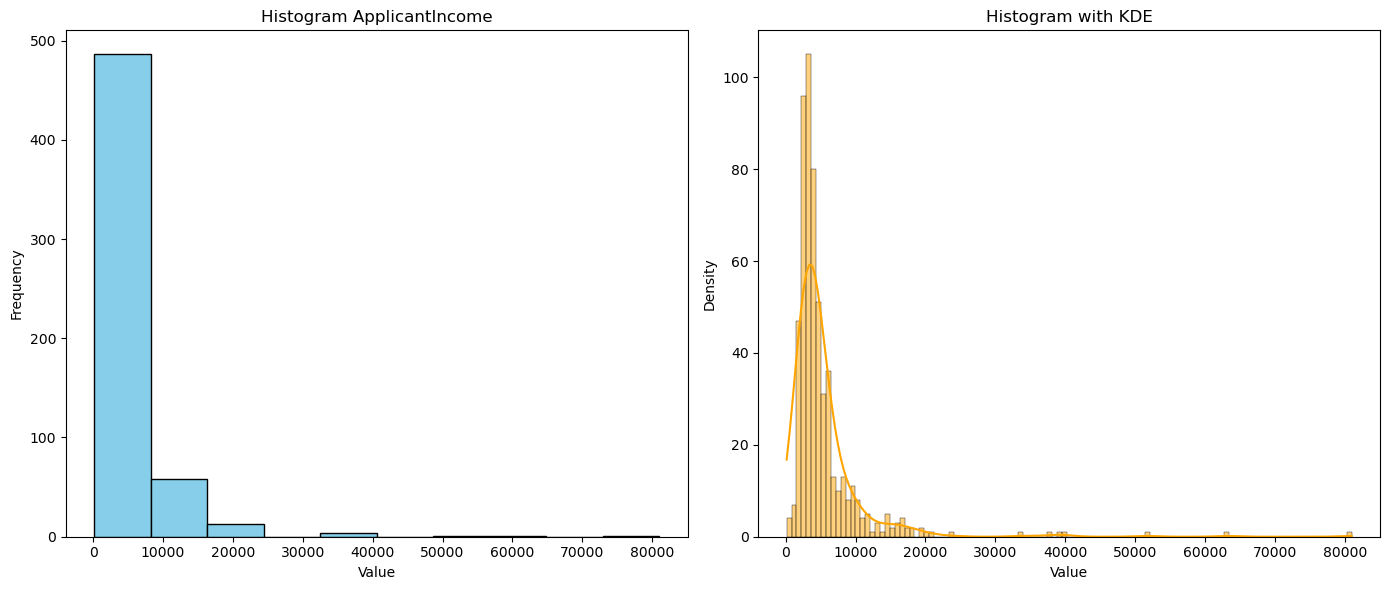

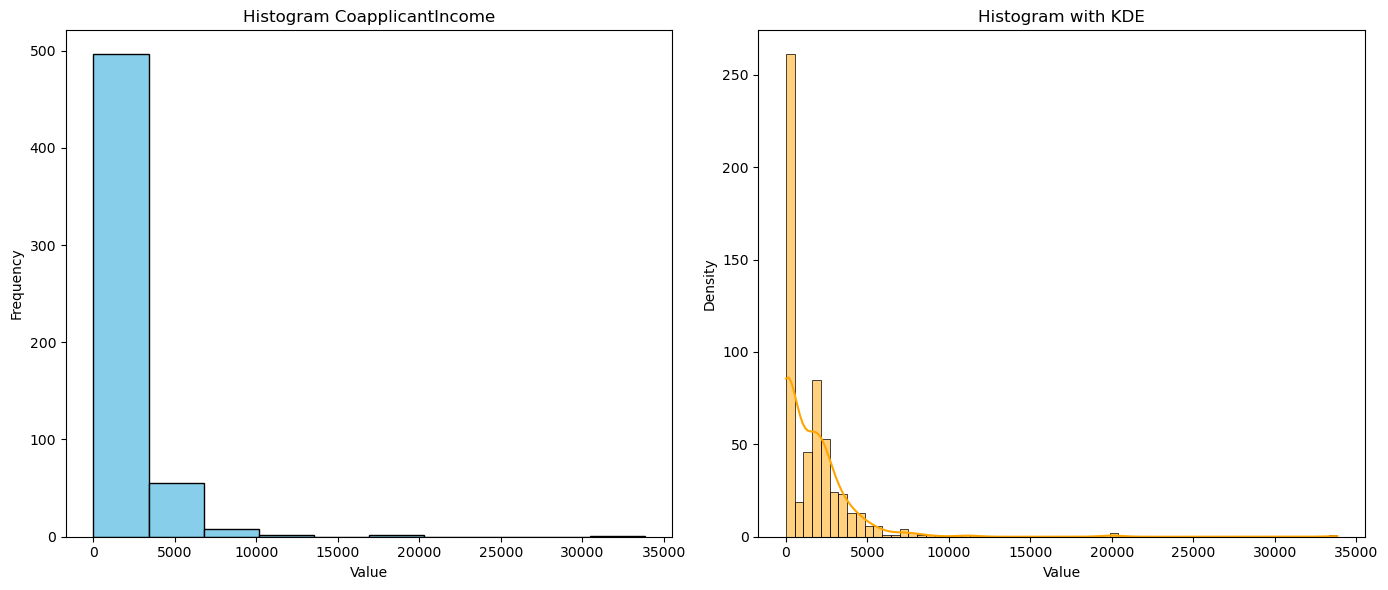

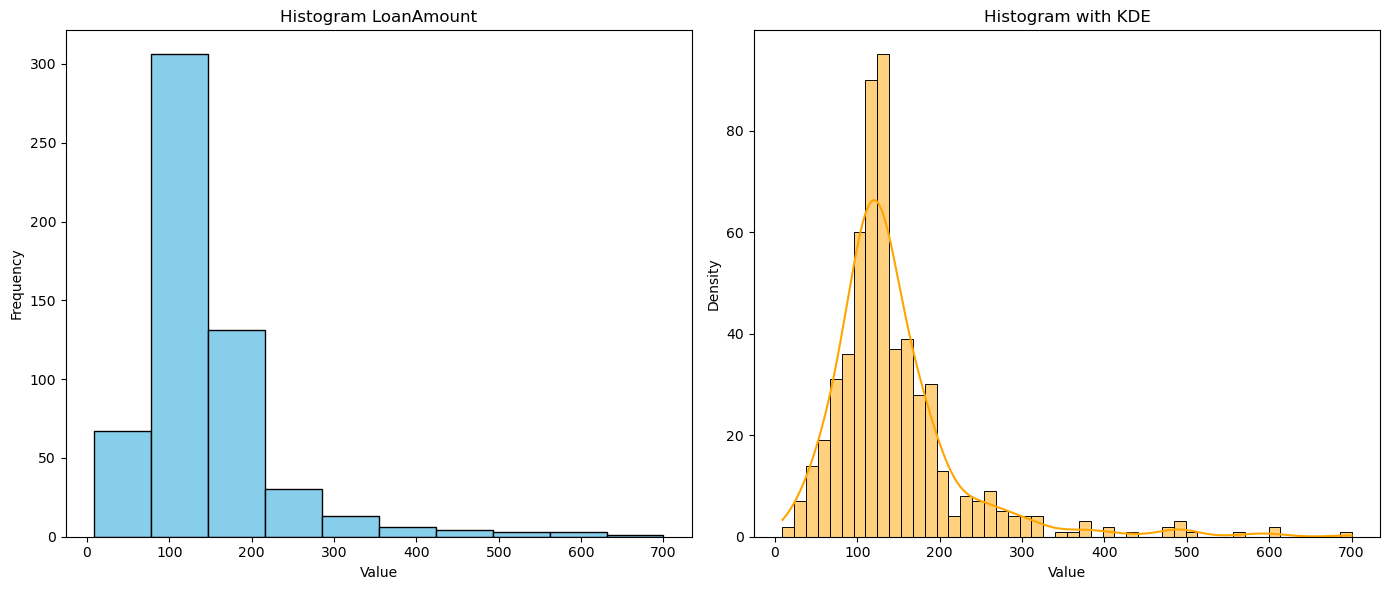

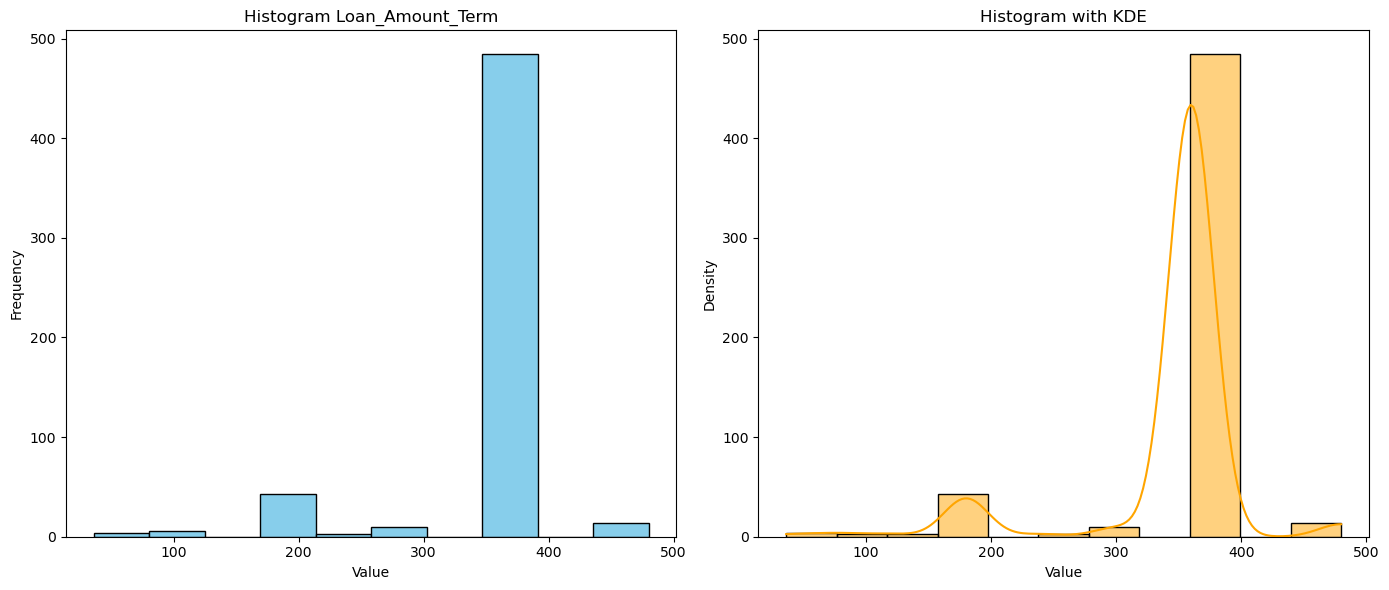

In [52]:

pipeline_num_var = Pipeline([
    ('num_uni_variate_analysis', HistBoxChartTransformer())
])

loan_num_df = loan_df[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(loan_num_df)

**Observations**

- ApplicantIncome is right-skewed and has outliers.
- CoapplicantIncome is right-skewed and has outliers.
- LoanAmount follows a bell curve but has a right-hand side tail and outliers.
- Loan_Amount_Term is left-skewed and has outliers.


# 8. Numerical - Variables -Outliers Analysis - fillit

- Fill the outliers in Numericals cols with median

In [53]:
def find_outliers_fill_median(con_var):
    """find outliers and fill the outliers from the dataset for given var with median value"""
    
    print(f"Original-dataset for  variable : {con_var} and length :{len(loan_df)}")
    q1 = loan_df[con_var].quantile(0.25)
    q3 = loan_df[con_var].quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - (1.5*iqr)
    higher_fence = q3 + (1.5*iqr)

    cond1 = loan_df[con_var] < lower_fence
    cond2 = loan_df[con_var] > higher_fence

    
    con = cond1 |  cond2
    val = loan_df[con_var].median()
    loan_df[con_var]=np.where(con, val,loan_df[con_var])
    plt.boxplot(loan_df[con_var])
    plt.show()

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
Original-dataset for  variable : ApplicantIncome and length :564


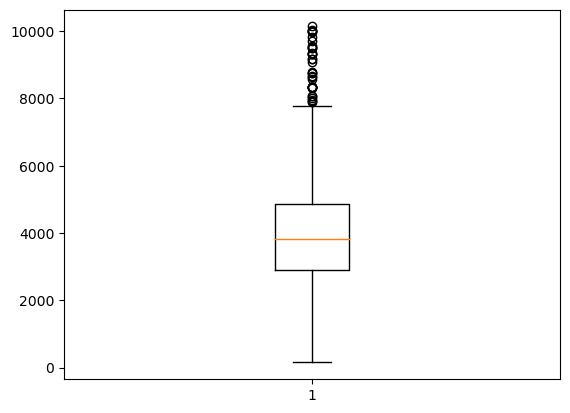

Original-dataset for  variable : CoapplicantIncome and length :564


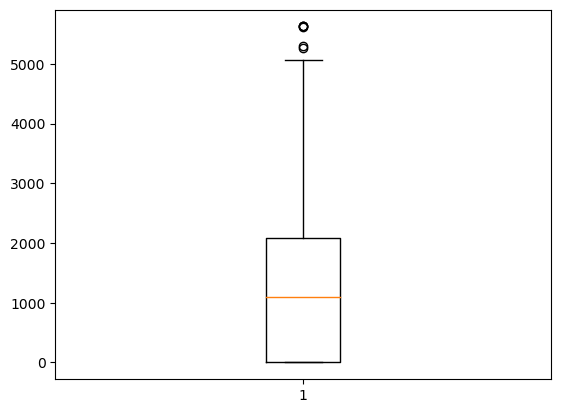

Original-dataset for  variable : LoanAmount and length :564


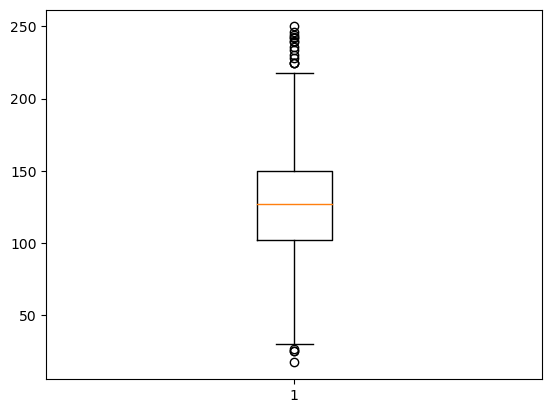

Original-dataset for  variable : Loan_Amount_Term and length :564


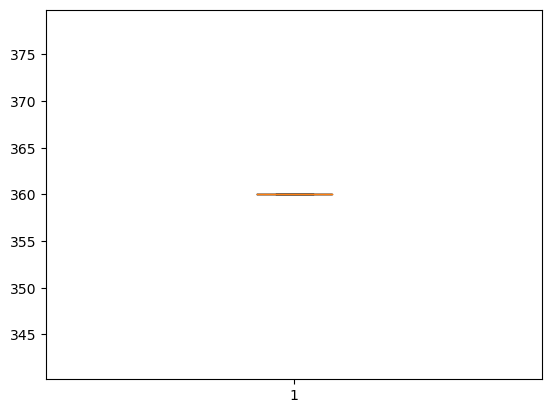

In [54]:
con_vars = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]
print(con_vars)
for var in con_vars:
    find_outliers_fill_median(var)
    print("========================================================")

# 9. Bi Variate Analyis

## 9.1 cat to target(cat)

In [55]:
cat_vars = loan_df.select_dtypes(include="object").columns
print(cat_vars)
cat_vars = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')


Loan_Status    N    Y
Gender               
Female        36   65
Male         143  320
Loan_Status    N    Y
Married              
No            74  125
Yes          105  260
Loan_Status    N    Y
Dependents           
0            108  223
1             30   60
2             25   70
3             16   32
Loan_Status     N    Y
Education             
Graduate      130  313
Not Graduate   49   72
Loan_Status      N    Y
Self_Employed          
No             154  335
Yes             25   50
Loan_Status     N    Y
Property_Area         
Rural          65  100
Semiurban      49  168
Urban          65  117


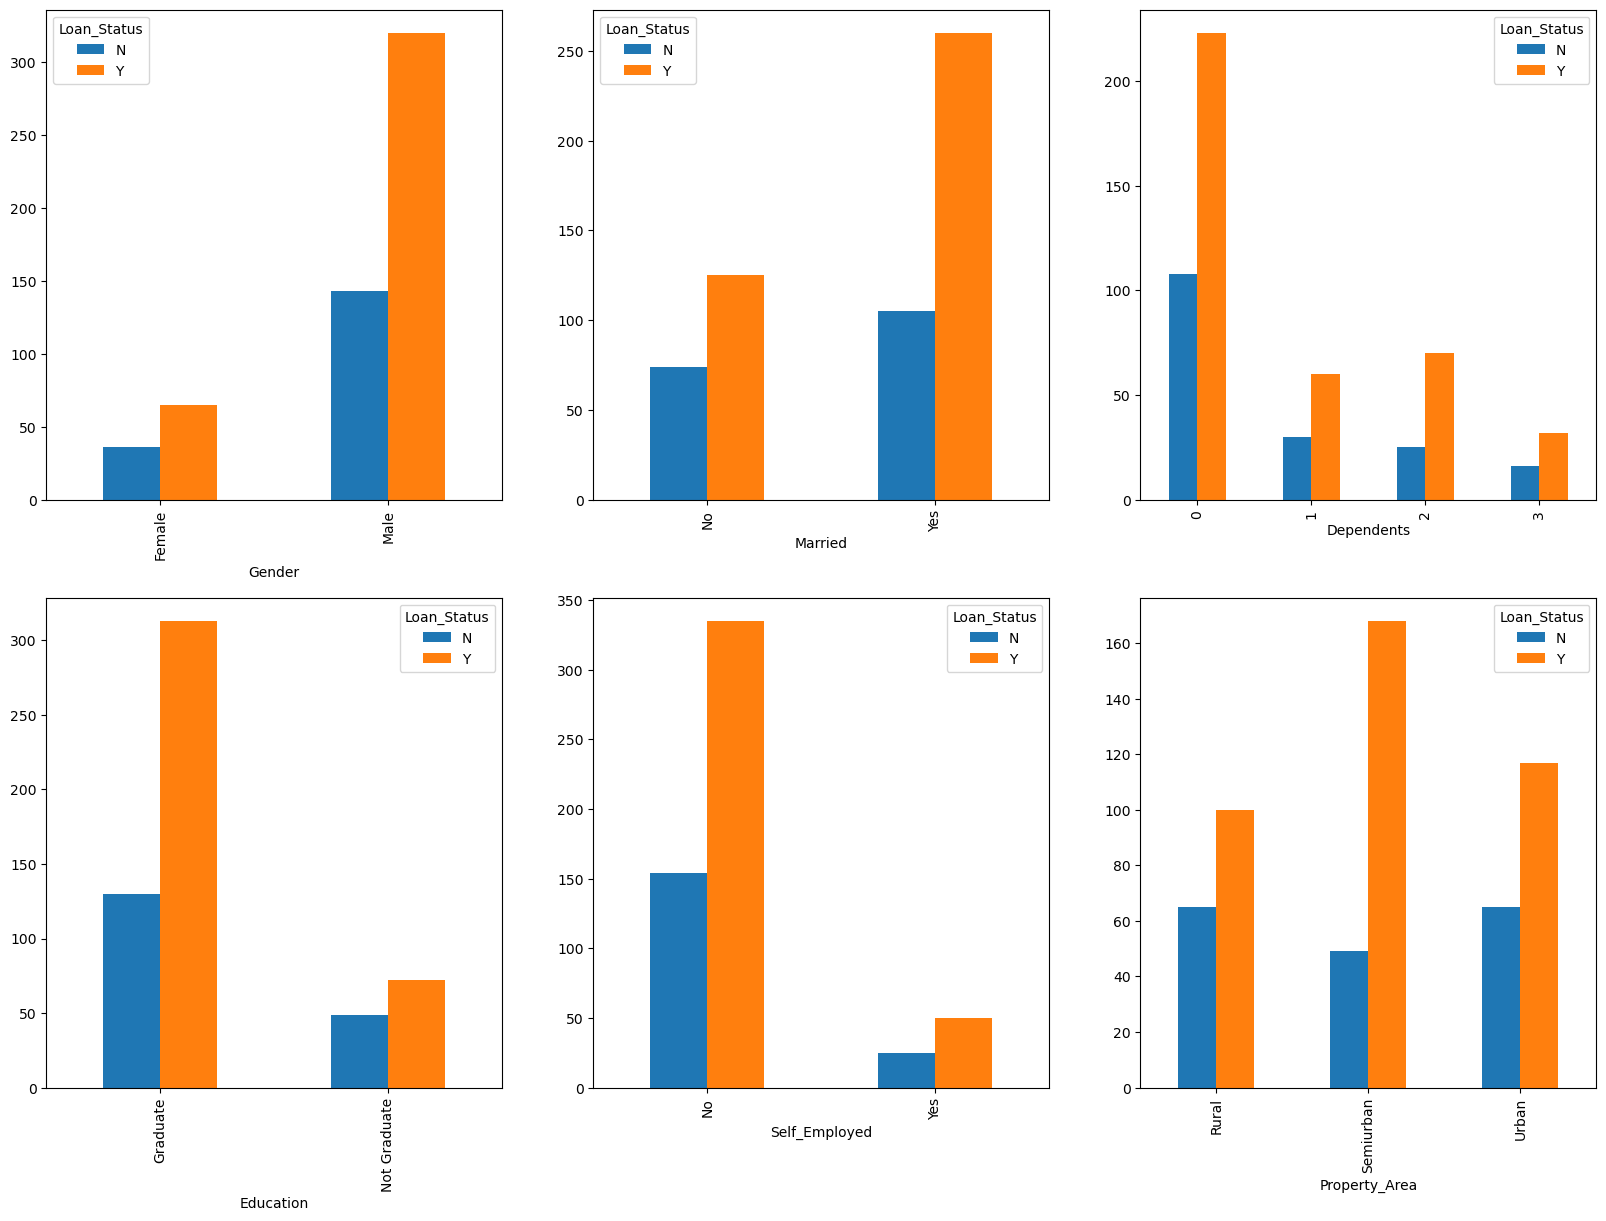

In [56]:
fig,ax = plt.subplots(2,3,figsize=(20,14))
for axi,x in zip(ax.flat,cat_vars):
    col1=loan_df[x]
    col2=loan_df['Loan_Status']
    result=pd.crosstab(col1,col2)
    print(result)
    print("===============================")
    result.plot(kind='bar',ax=axi)


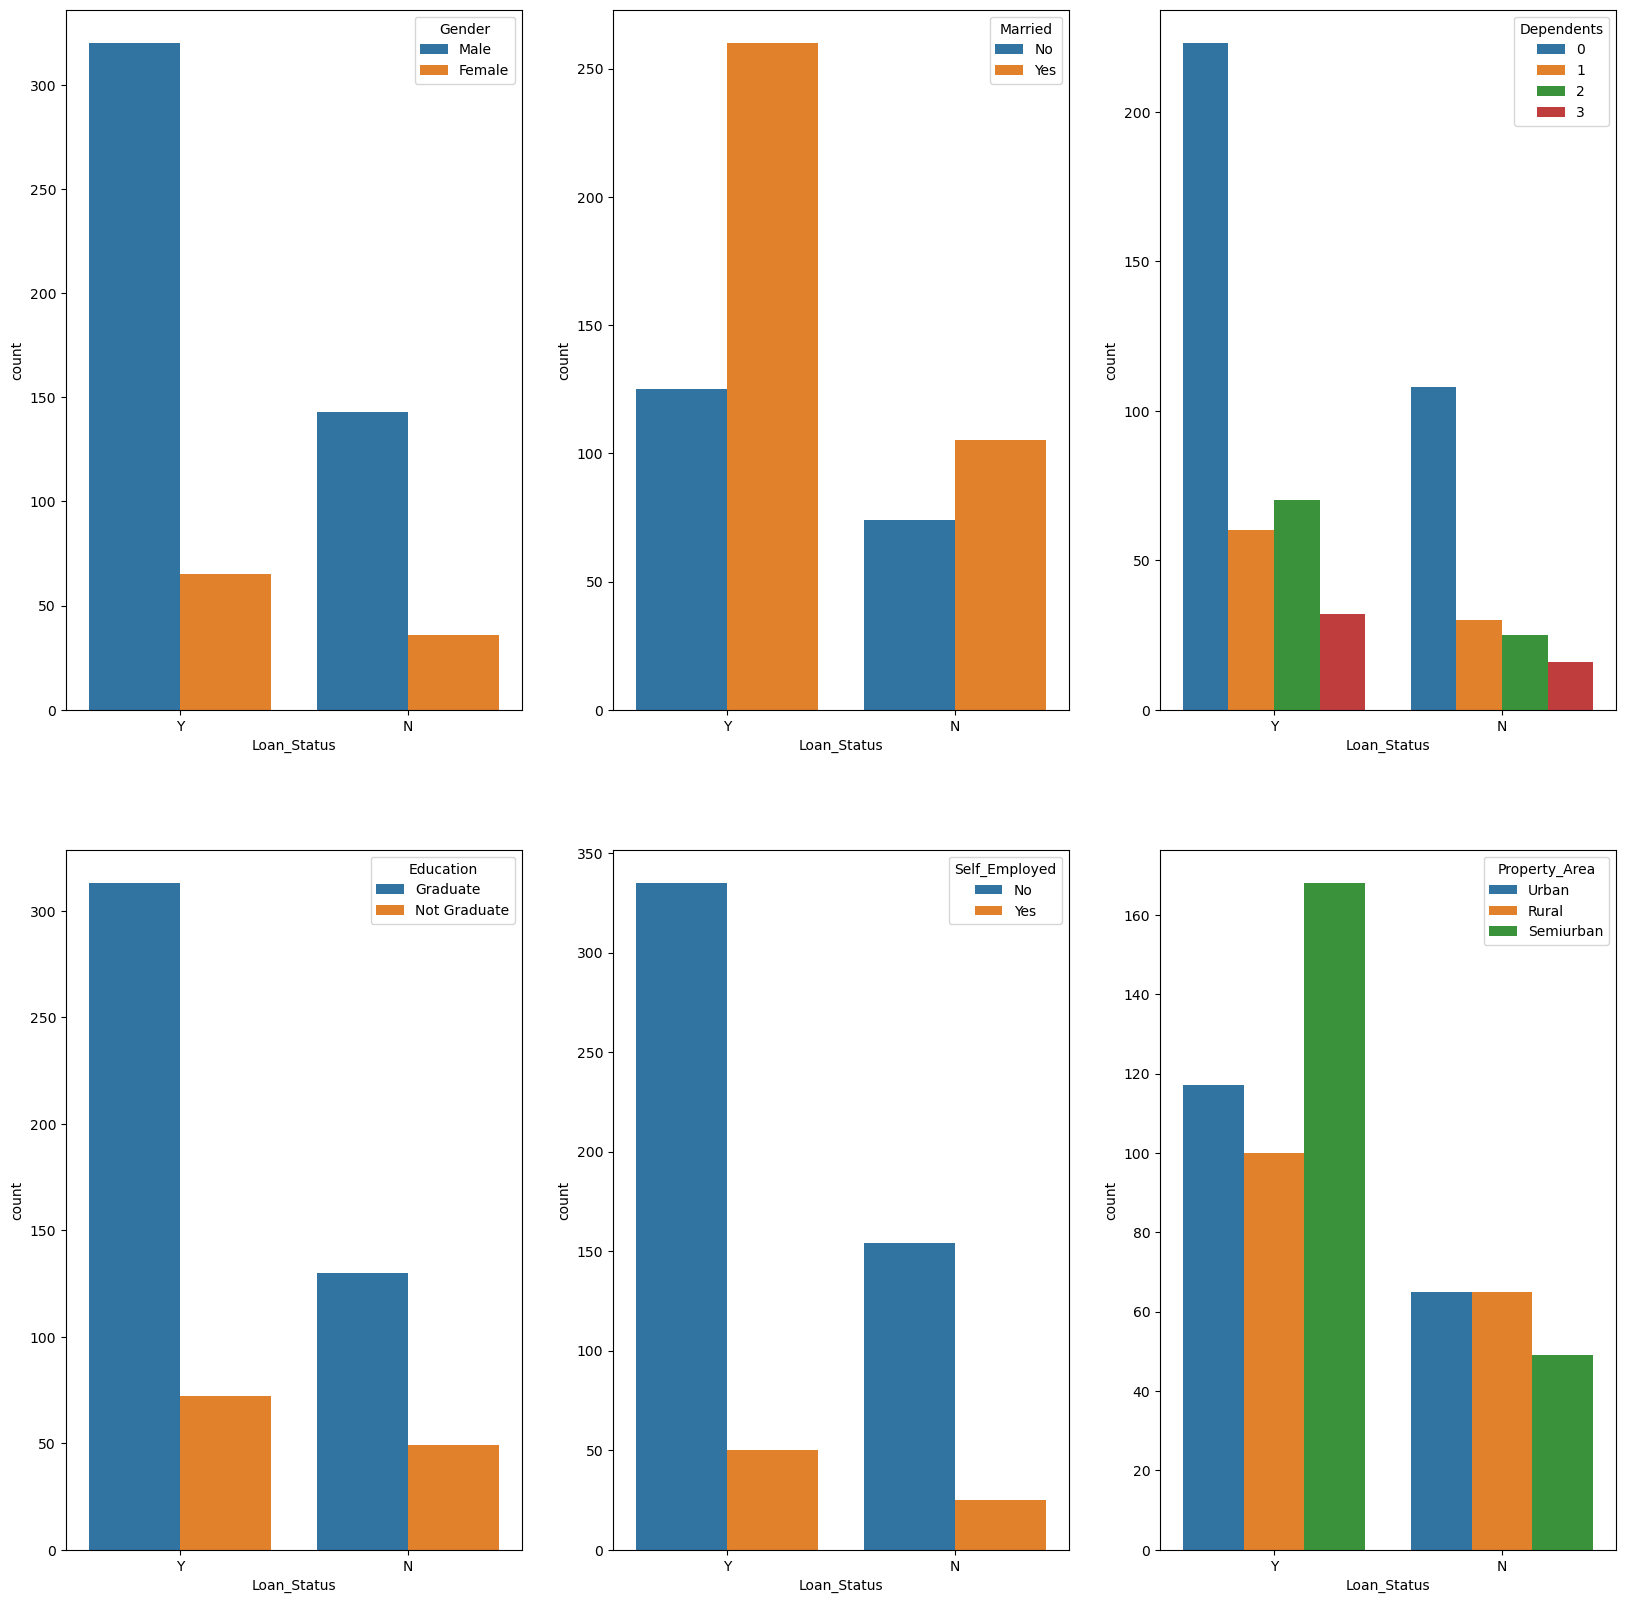

In [57]:
## Cat Vs Cat
output='Loan_Status'
fig,ax = plt.subplots(2,3,figsize=(20,20))
for axi,x in zip(ax.flat,cat_vars):
    sns.countplot(x=output,hue=x,ax=axi,data=loan_df)

## 9.2 Num vs Num

### Scatter Plots for corelation b/w numerical vribles

In [58]:
num_cols1 = loan_df.select_dtypes(exclude="object").columns.to_list()
num_cols2 = num_cols1.copy()
num_cols2

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

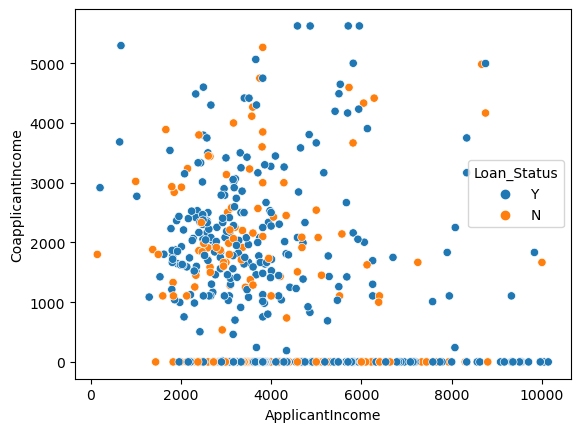

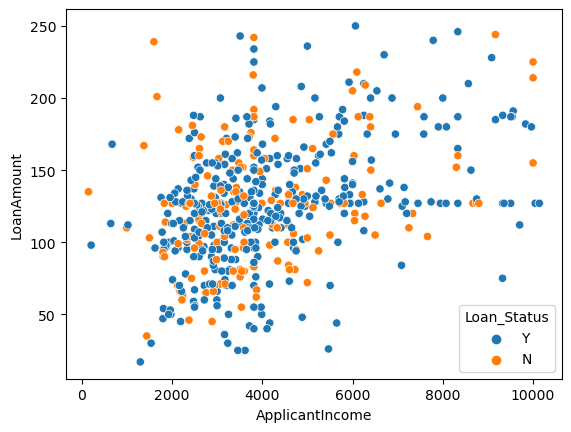

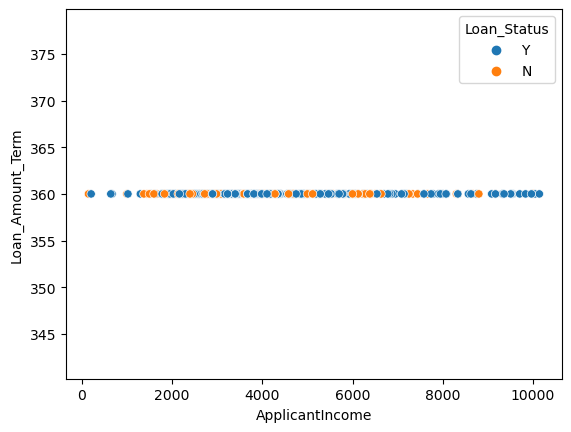

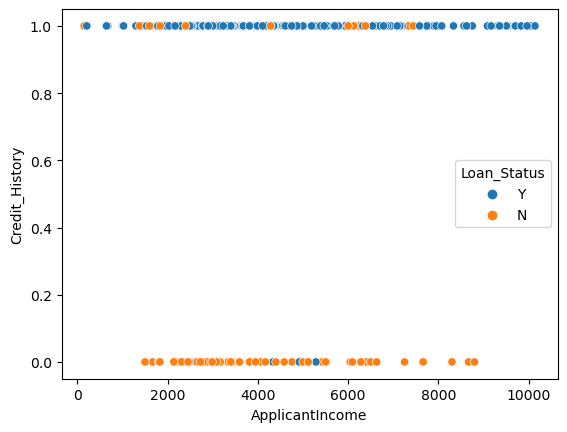

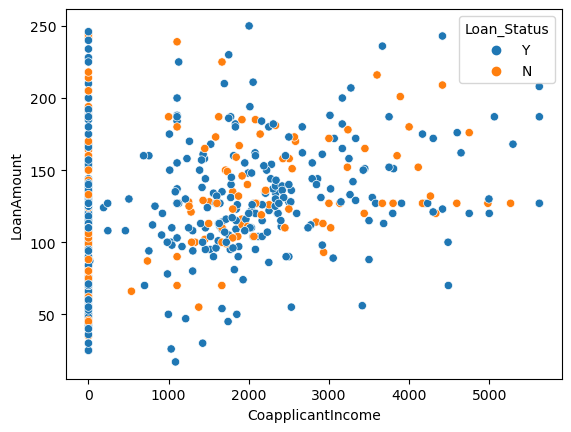

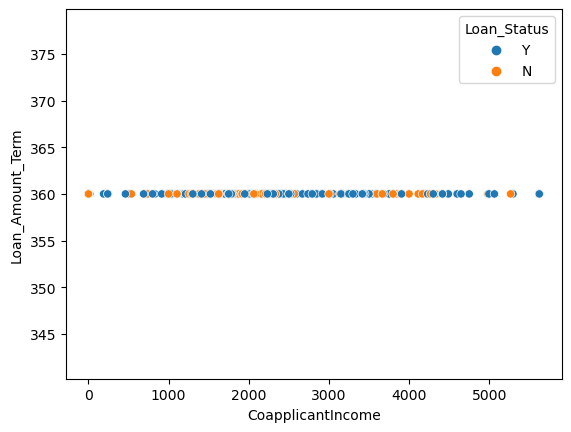

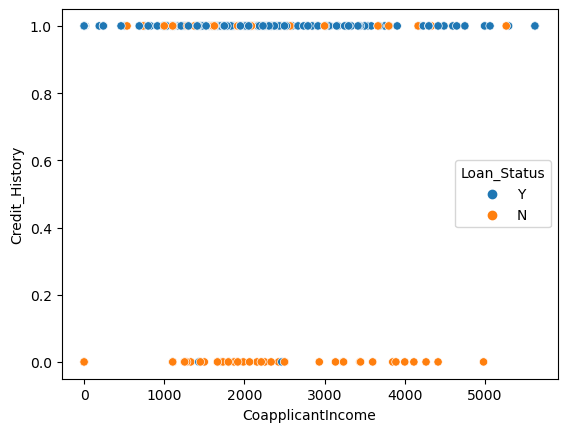

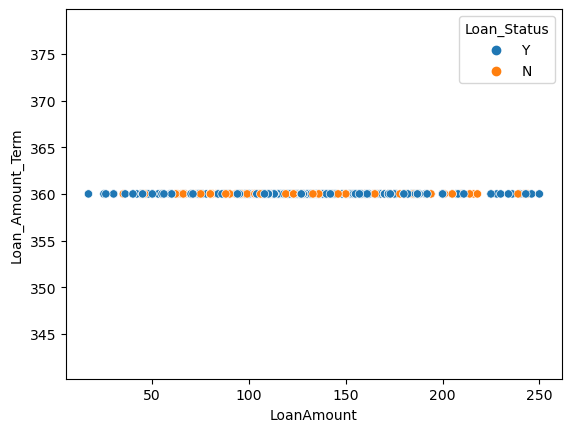

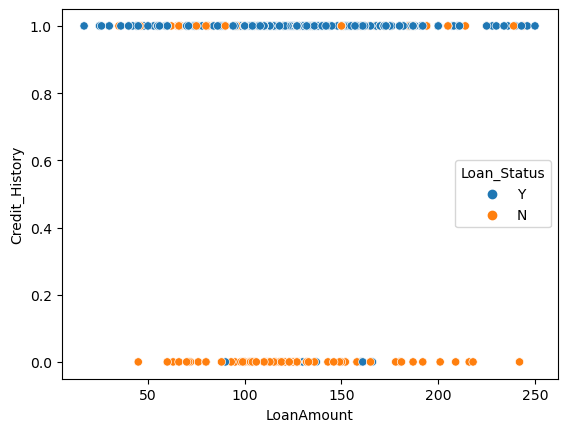

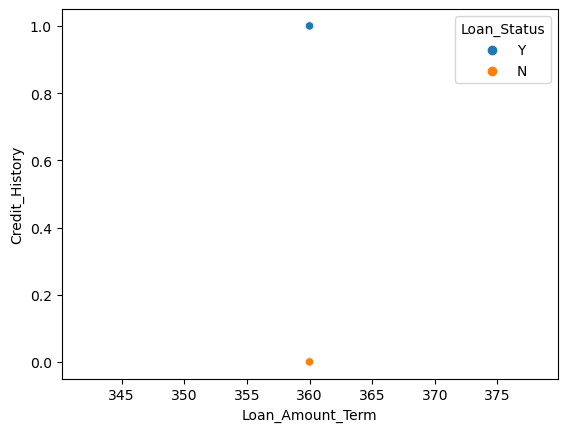

In [59]:
for i in num_cols1:
    for j in num_cols2:
        if i == j:
            pass
        else:
            sns.scatterplot(x=i,y=j,hue='Loan_Status',data=loan_df)
            plt.show()
    num_cols2.pop(0)
    

<Axes: >

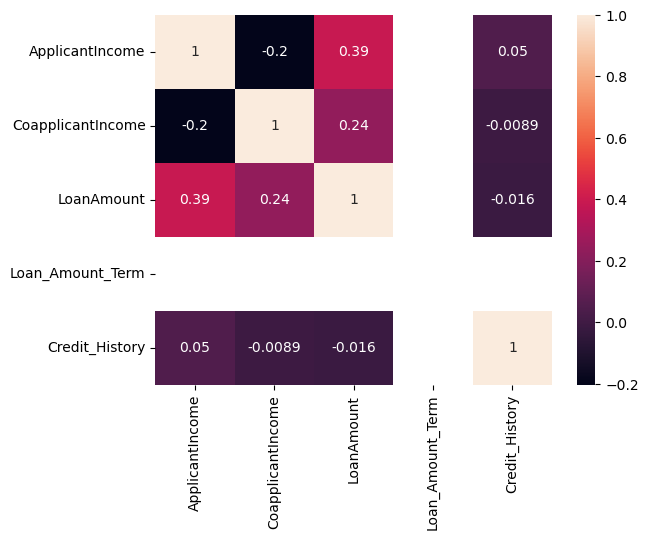

In [60]:
corr_mat=loan_df.corr(numeric_only=True)
sns.heatmap(corr_mat,annot=True)

In [61]:
loan_df.select_dtypes(exclude="object").columns
output_var='Loan_Status'

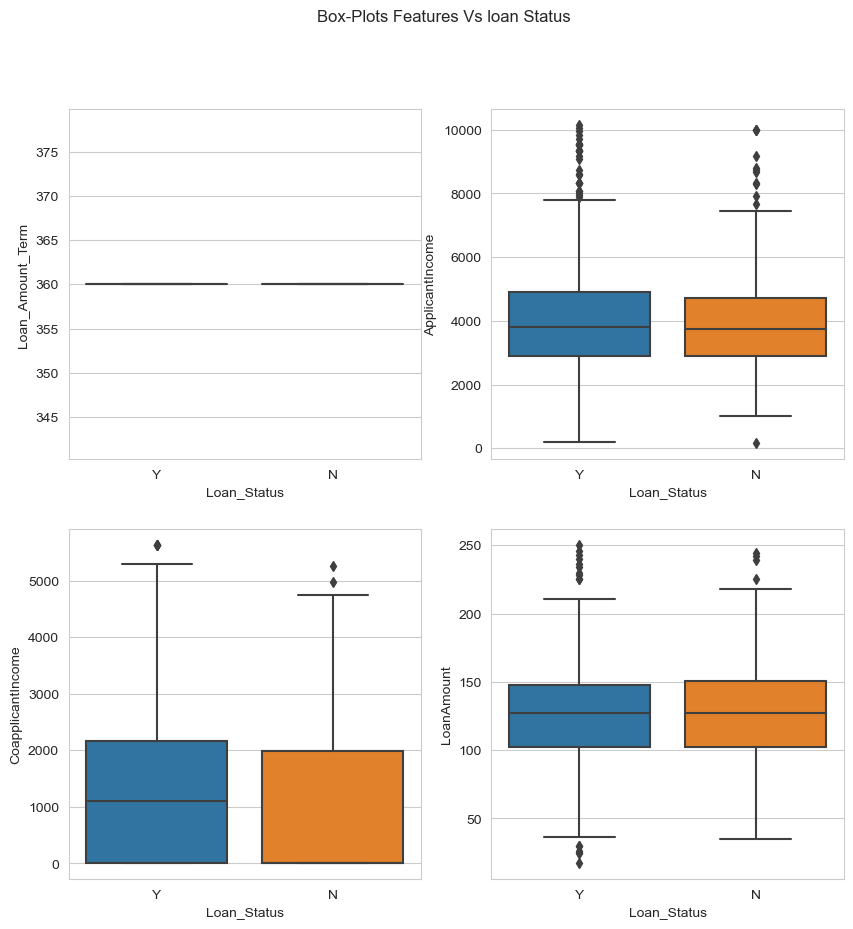

In [62]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Box-Plots Features Vs loan Status')
sns.boxplot(ax=axes[0, 0], x=output_var, y='Loan_Amount_Term', data=loan_df)
sns.boxplot(ax=axes[0, 1], x=output_var, y='ApplicantIncome', data=loan_df)
sns.boxplot(ax=axes[1, 0], x=output_var, y='CoapplicantIncome', data=loan_df)
sns.boxplot(ax=axes[1, 1], x=output_var, y='LoanAmount', data=loan_df)
plt.show()

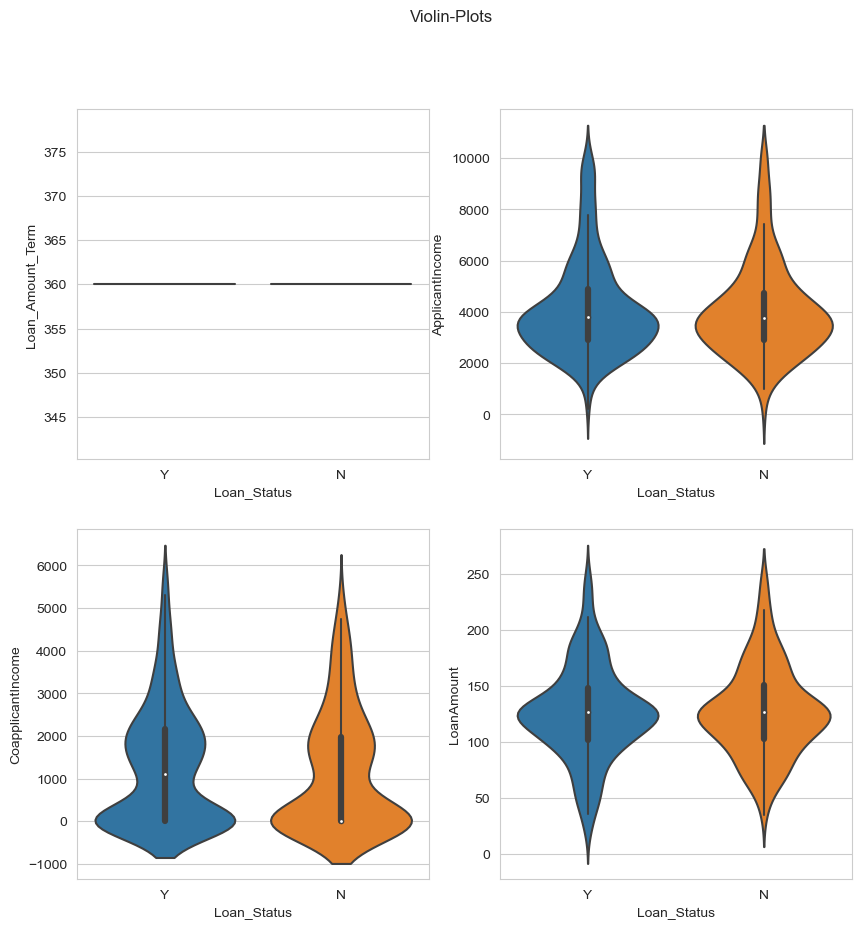

In [63]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Violin-Plots')
sns.violinplot(ax=axes[0, 0], x=output_var, y='Loan_Amount_Term', data=loan_df)
sns.violinplot(ax=axes[0, 1], x=output_var, y='ApplicantIncome', data=loan_df)
sns.violinplot(ax=axes[1, 0], x=output_var, y='CoapplicantIncome', data=loan_df)
sns.violinplot(ax=axes[1, 1], x=output_var, y='LoanAmount', data=loan_df)
plt.show()

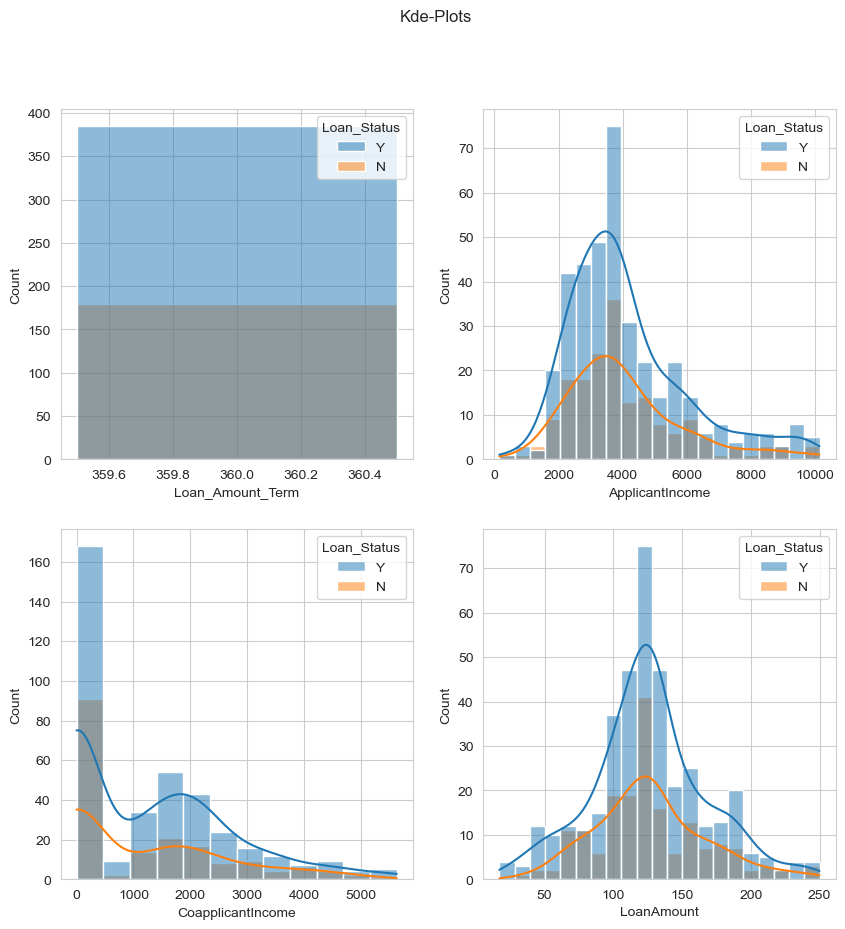

In [64]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Kde-Plots')
sns.histplot(ax=axes[0, 0], hue=output_var, x='Loan_Amount_Term', data=loan_df,kde=True)
sns.histplot(ax=axes[0, 1], hue=output_var, x='ApplicantIncome', data=loan_df,kde=True)
sns.histplot(ax=axes[1, 0], hue=output_var, x='CoapplicantIncome', data=loan_df,kde=True)
sns.histplot(ax=axes[1, 1], hue=output_var, x='LoanAmount', data=loan_df,kde=True)
plt.show()

## 9.3 Credit History

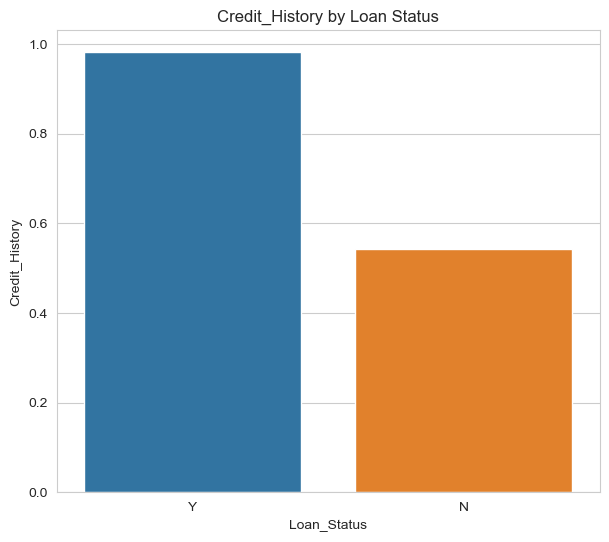

In [65]:
plt.figure(figsize=(7, 6))
sns.barplot(x=output_var, y='Credit_History', data=loan_df, errorbar = None)
plt.title('Credit_History by Loan Status')
plt.show()

<Axes: ylabel='Frequency'>

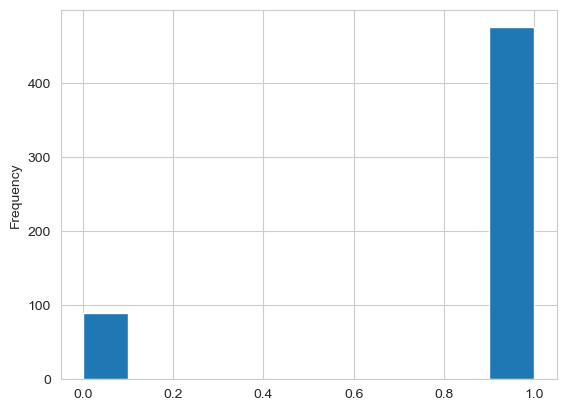

In [66]:
loan_df["Credit_History"].plot(kind='hist')

# Ch2-test

In [67]:
cat_vars = loan_df.select_dtypes(include='object').columns
cat_vars

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [68]:
cat_vars = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area','Credit_History']
output_var='Loan_Status'

for var in cat_vars:
    col1=loan_df[var]
    col2=loan_df[output_var]
    r = pd.crosstab(col1,col2)
    print(r)


Loan_Status    N    Y
Gender               
Female        36   65
Male         143  320
Loan_Status    N    Y
Married              
No            74  125
Yes          105  260
Loan_Status    N    Y
Dependents           
0            108  223
1             30   60
2             25   70
3             16   32
Loan_Status     N    Y
Education             
Graduate      130  313
Not Graduate   49   72
Loan_Status      N    Y
Self_Employed          
No             154  335
Yes             25   50
Loan_Status     N    Y
Property_Area         
Rural          65  100
Semiurban      49  168
Urban          65  117
Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


In [69]:
from scipy.stats import chi2_contingency
for var in cat_vars:
    col1=loan_df[var]
    col2=loan_df[output_var]
    cross_tab = pd.crosstab(col1,col2)
    # Perform Chi-square test
    chi2, p, dof, expected = chi2_contingency(cross_tab)

    # Output the results
    print("Chi-square statistic:", chi2)
    print("p-value:", p)
    print("Degrees of freedom:", dof)
    print("========================================")


Chi-square statistic: 0.660706500753895
p-value: 0.4163106327170538
Degrees of freedom: 1
Chi-square statistic: 3.833569626779222
p-value: 0.050235837334484355
Degrees of freedom: 1
Chi-square statistic: 1.5724448299896616
p-value: 0.6656537817890147
Degrees of freedom: 3
Chi-square statistic: 4.951806935721997
p-value: 0.02606341414959496
Degrees of freedom: 1
Chi-square statistic: 0.034465161804641584
p-value: 0.8527208474959256
Degrees of freedom: 1
Chi-square statistic: 14.19155779870171
p-value: 0.0008285951352789198
Degrees of freedom: 2
Chi-square statistic: 174.63729658142535
p-value: 7.184759548750746e-40
Degrees of freedom: 1


In [70]:
num_vars = loan_df.select_dtypes(exclude='object').columns
num_vars

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [71]:
loan_df['Loan_Status'].value_counts()

Loan_Status
Y    385
N    179
Name: count, dtype: int64

In [72]:
def point_bi_serial_coeff(con_var):
    # Compute means for pass and fail
    mean_pass = loan_df[loan_df['Loan_Status'] == 'Y'][con_var].mean()
    mean_fail = loan_df[loan_df['Loan_Status'] == 'N'][con_var].mean()

    # Compute standard deviation
    std = loan_df[con_var].std()

    # Compute number of cases
    n_pass = len(loan_df[loan_df['Loan_Status'] == 'Y'])
    #print(n_pass)
    
    n_fail = len(loan_df) - n_pass
    n_total = len(loan_df)

    #print(mean_pass)
    #print(mean_fail)
    #print(std)
    #print(n_pass)
    #print(n_fail)
    #print(n_total)
    # Compute point-biserial correlation coefficient
    point_biserial_corr = (mean_pass - mean_fail) / (std) * np.sqrt((n_pass * n_fail) / (n_total**2 * (n_total - 1)))

    print("Point-biserial correlation coefficient:", point_biserial_corr)



In [73]:
for i in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    point_bi_serial_coeff(i)

Point-biserial correlation coefficient: 0.0009354296921727685
Point-biserial correlation coefficient: 0.0018856589451981983
Point-biserial correlation coefficient: -0.0005705430797298361


In [74]:
from scipy.stats import f_oneway
# Perform one-way ANOVA
f_statistic, p_value = f_oneway(loan_df['ApplicantIncome'],  loan_df['CoapplicantIncome'])

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between group means.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between group means.")

F-statistic: 860.6533137408808
p-value: 5.377724361570447e-141
Reject the null hypothesis. There is a significant difference between group means.
